# **Project-Plant Seeding Classification**




## **Dataset**

Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its 
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a 
plant's species from a photo.
Dataset:
The dataset can be download from Olympus.
The data file names are:
• images.npy
• Label.csv
The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels 
are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data 
volume.
The following code was used to convert the large dataset of images to numpy array:
```
from google.colab import drive
drive.mount('/content/drive')
```


4) Now, you can read the dataset as mentioned in the code below.

## **Problem Statement**
Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages
Objective:
To implement the techniques learnt as a part of the course.
Learning Outcomes:
• Pre-processing of image data.
• Visualization of images.
• Building CNN.
• Evaluate the Model.
• The motive of the project is to make the learners capable to handle images/image classification problems, during this 
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.
Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:
• Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the 
attached problem statement should not be missed.
• Download the dataset from the Olympus platform.
• Upload the "images.npy" and “Labels.csv” file to google drive.
• Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem 
statement.
• You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit 
your model.
Note:
• Download the images.npy file from the Olympus Platform.
• Do not download the dataset from Kaggle, as:
o The dataset is big.
o The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no 
labels associated with it. So, when you want to know the accuracy of model on test images, there’s no 
way to measure it. That’s why the data provided to you on Olympus has only train images converted into 
numpy array and their labels in the csv file. For our purpose we use this for our training and testing and 
validation purpose



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Reading the training images from the path and labelling them into the given categories
import math
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers


In [7]:
Data = pd.read_csv('/content/drive/MyDrive/UT-Austin-AIML/7-Introduction-to-Nueral-Networks/Week2-BuildingBlocks/Labels.csv')

In [8]:
np.load('/content/drive/MyDrive/UT-Austin-AIML/7-Introduction-to-Nueral-Networks/Week2-BuildingBlocks/images.npy')

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

In [10]:
## Read Images and Labels ###
data_path = '/content/drive/MyDrive/UT-Austin-AIML/7-Introduction-to-Nueral-Networks/Week2-BuildingBlocks/train.zip' 
## !mkdir dataset
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.) 
from zipfile import ZipFile
with ZipFile(data_path, 'r') as zipObj:
  zipObj.extractall('./dataset')
path = "/content/drive/MyDrive/UT-Austin-AIML/7-Introduction-to-Nueral-Networks/Week2-BuildingBlocks/dataset/*/*.*" 
# The path to all images in training set. (* means include all folder s and files.)
files = glob(path)
trainImg = [] # Initialize empty list to store the image data as numbers.
trainLabel = [] # Initialize empty list to store the labels of images
j = 1
num = len(files)
# Obtain images and resizing, obtain labels 
for img in files:
  print(str(j) + "/" + str(num), end="\r")
trainImg.append(cv2.resize(cv2.imread(img), (128, 128))) # Get image (with resizing to 128x128)
trainLabel.append(img.split('/')[-2]) # Get image label (folder name contains the class to which the image belong)
j += 1
trainImg = np.asarray(trainImg) # Train images set
trainLabel = pd.DataFrame(trainLabel, columns=["Label"]) # Train labels set
print(trainImg.shape)
print(trainLabel.shape)
trainLabel.to_csv('Labels.csv', index=False)
np.save('plantimages', trainImg)

(1, 128, 128, 3)
(1, 1)


### **Importing the libraries**

### **Reading the TRAIN Data**

In [11]:
DATADIR = "/content/drive/MyDrive/UT-Austin-AIML/7-Introduction-to-Nueral-Networks/Week2-BuildingBlocks/dataset/train/"
CATEGORIES = ["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed"]
IMG_SIZE=128
#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


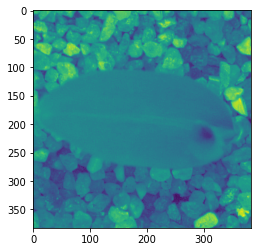

In [12]:
path = os.path.join(DATADIR,"Maize")
for img in os.listdir(path):
  img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
  imgplot = plt.imshow(img_array)


### **Reading the Testing Dataset(NOT NEEDED)**


In [ ]:
#@title NOT NEEDED

DATADIR = "/content/drive/MyDrive/UT-Austin-AIML/7-Introduction-to-Nueral-Networks/Week2-BuildingBlocks/dataset/test/"
## CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
IMG_SIZE=128
#Storing all the training images
testing_data = []

def create_testing_data():
   ## for category in CATEGORIES:
      ##  path = os.path.join(DATADIR,category)
      ##  class_num = CATEGORIES.index(category)
   for img in os.listdir(DATADIR):
            try:
                img_array = cv2.imread(DATADIR,img,cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                testing_data.append([new_array])
            except Exception as e:
                pass
create_testing_data()


In [ ]:
create_testing_data()

### **Data Preprocessing** 

In [13]:
# Separating the images and labels
X = []
y = []
np.random.shuffle(training_data)
for features,label in training_data:
    X.append(features)
    y.append(label)
X= np.array(X)
print(X.shape)

# Normalizing pixel values  
X = X/255.0  
# image reshaping 
## X = X.reshape(-1,128,128,1)

(3578, 128, 128)


In [14]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1,stratify=y)

Let's visualize some numbers using matplotlib

Label: 1


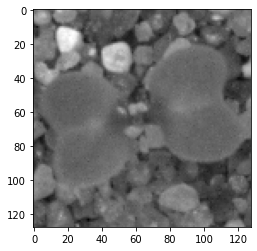

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[2000]))
plt.imshow(X_train[2000], cmap='gray')

In [16]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (3220, 128, 128)
Images in X_train: 3220
Images in X_test: 358
Max value in X_train: 1.0
Min value in X_train: 0.0


In [17]:
X_train.shape

(3220, 128, 128)

In [18]:
df=pd.DataFrame(y_train)

**Importing required Keras modules**

In [19]:
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.

### **Exploratory Data Analysis**

**Let's visualize MRI images randomly from each of the three classes.** The Image matrix is plotted and each row represents three single channel images corresponding to one class. We have read single channel images in order to reduce complexity. 




In [20]:
#train_dir = 'DATA/train' # image folder
import os
## "Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed"##
# get the list of jpegs from sub image class folders
bg_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
ch_mgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
cl_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
cc_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[3]}') ]
cw_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[4]}') ]
fh_mgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[5]}') ]
lsb_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[6]}') ]
ma_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[7]}') ]
sm_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[8]}') ]


# randomly select 3 of each
sel_bg_imgs = np.random.choice(bg_imgs, 2, replace = False)
sel_ch_mgs = np.random.choice(ch_mgs, 2, replace = False)
sel_cl_imgs = np.random.choice(cl_imgs, 2, replace = False)
sel_cc_imgs = np.random.choice(cc_imgs, 2, replace = False)
sel_cw_imgs = np.random.choice(cw_imgs, 2, replace = False)
sel_fh_mgs = np.random.choice(fh_mgs, 2, replace = False)
sel_lsb_imgs = np.random.choice(lsb_imgs, 2, replace = False)
sel_ma_imgs = np.random.choice(ma_imgs, 2, replace = False)
sel_sm_imgs = np.random.choice(sm_imgs, 2, replace = False)

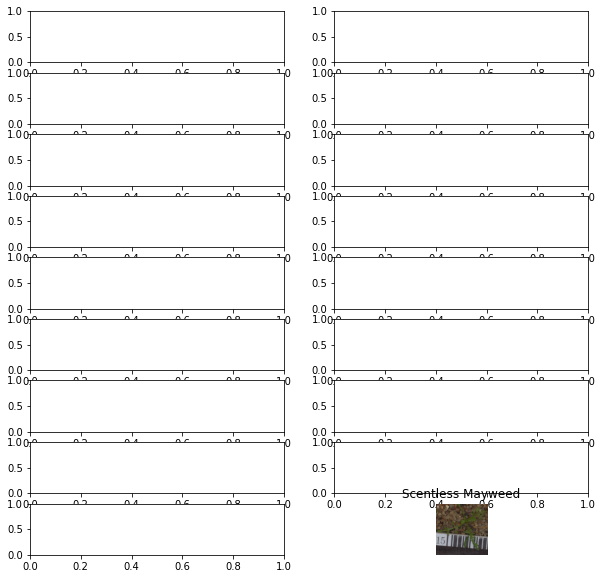

In [21]:
from tensorflow.keras.preprocessing import image
# plotting 2 x 9 image matrix
fig = plt.figure(figsize = (10,10))
## "Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed"##
for i in range(18):
    if i < 2:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{sel_bg_imgs[i]}'
        label = 'Black-grass'
    if i>=2 and i<4:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{sel_ch_mgs[i-2]}'
        label = 'Charlock' 
    if i>=4 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{sel_cl_imgs[i-4]}'
        label = 'Cleavers'
    if i>=6 and i<8:
        fp = f'{DATADIR}/{CATEGORIES[3]}/{sel_cc_imgs[i-6]}'
        label = 'Common Chickweed'
    if i>=8 and i<10:
        fp = f'{DATADIR}/{CATEGORIES[4]}/{sel_cw_imgs[i-8]}'
        label = 'Common wheat'
    if i>=10 and i<12:
        fp = f'{DATADIR}/{CATEGORIES[5]}/{sel_fh_mgs[i-10]}'
        label = 'Fat Hen' 
    if i>=12 and i<14:
        fp = f'{DATADIR}/{CATEGORIES[6]}/{sel_lsb_imgs[i-12]}'
        label = 'Loose Silky-bent'
    if i>=14 and i<16:
        fp = f'{DATADIR}/{CATEGORIES[7]}/{sel_ma_imgs[i-14]}'
        label = 'Maize'
    if i>=16 and i<18:
        fp = f'{DATADIR}/{CATEGORIES[8]}/{sel_sm_imgs[i-16]}'
        label = 'Scentless Mayweed'
    ax = fig.add_subplot(9, 2, i+1)

# to plot without rescaling, remove target_size
fn = image.load_img(fp, target_size = (150,150), color_mode='rgb')
plt.imshow(fn, cmap='Greys_r')
plt.title(label)
plt.axis('off')
plt.show()


**Finding the mean images** for each class of Plant : 

In [ ]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
   ## mean_img = mean_img.reshape((200,200))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

bg_data=[]
ch_data=[]
cl_data=[]
cc_data=[]
cw_data=[]
fh_data=[]
lsb_data=[]
ma_data=[]
sm_data=[]

for cat in CATEGORIES:
        path = os.path.join(DATADIR,cat)
        for img in os.listdir(path):
                
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                if cat==CATEGORIES[0]:
                      bg_data.append([new_array])
                if cat==CATEGORIES[1]:
                      ch_data.append([new_array])
                if cat==CATEGORIES[2]:
                      cl_data.append([new_array])
                if cat==CATEGORIES[3]:
                      cc_data.append([new_array])
                if cat==CATEGORIES[4]:
                      cw_data.append([new_array])
                if cat==CATEGORIES[5]:
                      fh_data.append([new_array])
                if cat==CATEGORIES[6]:
                      lsb_data.append([new_array])
                if cat==CATEGORIES[7]:
                      ma_data.append([new_array])
                if cat==CATEGORIES[8]:
                      sm_data.append([new_array])

## "Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed"##          

bg_data_mean = find_mean_img(np.array(bg_data), 'Black-grass')
ch_data_mean = find_mean_img(np.array(ch_data), 'Charlock')
cl_data_mean = find_mean_img(np.array(cl_data), 'Cleavers')
cc_data_mean = find_mean_img(np.array(cc_data), 'Common Chickweed')
cw_data_mean = find_mean_img(np.array(cw_data), 'Common wheat')
fh_data_mean = find_mean_img(np.array(fh_data), 'Fat Hen')
lsb_data_mean = find_mean_img(np.array(lsb_data), 'Loose Silky-bent')
ma_data_mean = find_mean_img(np.array(ma_data), 'Maize')
sm_data_mean = find_mean_img(np.array(sm_data), 'Scentless Mayweed')


### **One-Hot Encoding**

In [22]:
encoded = to_categorical(np.array(y_train))
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test))
y_test_e=encoded_test

In [23]:
print(y_train_e.shape)
print(y_test_e.shape)

(3220, 9)
(358, 9)


### **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

In [25]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 150 x 150 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(9, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [26]:
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 500)               8192500   
                                                                 
 dense_1 (Dense)             (None, 700)               350700    
                                                                 
 dense_2 (Dense)             (None, 9)                 6309      
                                                                 
Total params: 8,549,509
Trainable params: 8,549,509
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
32/41 [======================>.......] - ETA: 0s - loss: 3.8360 - accuracy: 0.1509
Epoch 1: val_accuracy improved from -inf to 0.16615, saving model to best_model.h5
41/41 [==============================] - 3s 18ms/step - loss: 3.5084 - accuracy: 0.1518 - val_loss: 2.1979 - val_accuracy: 0.1661
Epoch 2/200
33/41 [=======================>......] - ETA: 0s - loss: 2.2075 - accuracy: 0.1629
Epoch 2: val_accuracy did not improve from 0.16615
41/41 [==============================] - 0s 8ms/step - loss: 2.1976 - accuracy: 0.1712 - val_loss: 2.2483 - val_accuracy: 0.1211
Epoch 3/200
32/41 [======================>.......] - ETA: 0s - loss: 2.1519 - accuracy: 0.1782
Epoch 3: val_accuracy improved from 0.16615 to 0.18168, saving model to best_model.h5
41/41 [==============================] - 0s 12ms/step - loss: 2.1404 - accuracy: 0.1848 - val_loss: 2.1353 - val_accuracy: 0.1817
Epoch 4/200
36/41 [=========================>....] - ETA: 0s - loss: 2.0919 - accuracy: 0.1984
Epoch 4: va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


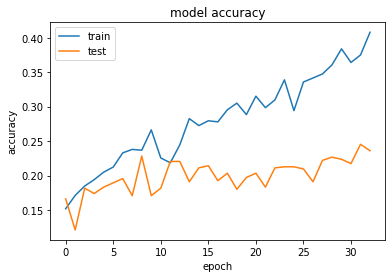

In [28]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [29]:
import numpy
model_ann.evaluate(X_test,y_test_e)

12/12 [==============================] - 0s 3ms/step - loss: 2.2093 - accuracy: 0.2179


[2.209285259246826, 0.2178770899772644]

As we see here, the **ANN does not show a good test accuracy**, since ANNs are unable to capture spatial correlation characteristics of the image. 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.** 
CNNs tend to behave well on image data but the important point to consider is, it may not be true until an optimized CNN is built depending on the data.

#### **Convolutional Neural Network (CNN)**

**Model 1:** CNN with Dropout

In [84]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


41/41 [==============================] - ETA: 0s - loss: 2.1457 - accuracy: 0.1673
Epoch 1: val_accuracy improved from -inf to 0.18478, saving model to best_model.h5
41/41 [==============================] - 3s 69ms/step - loss: 2.1457 - accuracy: 0.1673 - val_loss: 2.1489 - val_accuracy: 0.1848
Epoch 2/30
41/41 [==============================] - ETA: 0s - loss: 2.1269 - accuracy: 0.1770
Epoch 2: val_accuracy did not improve from 0.18478
41/41 [==============================] - 2s 49ms/step - loss: 2.1269 - accuracy: 0.1770 - val_loss: 2.1406 - val_accuracy: 0.1848
Epoch 3/30
41/41 [==============================] - ETA: 0s - loss: 2.1244 - accuracy: 0.1809
Epoch 3: val_accuracy did not improve from 0.18478
41/41 [==============================] - 2s 44ms/step - loss: 2.1244 - accuracy: 0.1809 - val_loss: 2.1452 - val_accuracy: 0.1661
Epoch 4/30
41/41 [==============================] - ETA: 0s - loss: 2.1265 - accuracy: 0.1727
Epoch 4: val_accuracy did not improve from 0.18478
41/41 [==

In [52]:
model.evaluate(X_test,np.array(y_test_e))

12/12 [==============================] - 0s 9ms/step - loss: 2.1230 - accuracy: 0.1816


[2.1230452060699463, 0.18156424164772034]

Here we can observe that this is performing better than ANN but we will try to optimize this model and improve its performance.

#### **Convolutional Neural Network (CNN)**

**Model 2:** CNN with Dropout after Convolution and having two Dense layers with 2048 & 64 units respectively with 500 epochs

In [49]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model2 = Sequential()
#
y_train=np.array(y_train)
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
#
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))
#
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))
#
model2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

#
model2.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

# 
model2.add(Flatten())
model2.add(Dense(2048, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(9, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 500  
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history2=model2.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/21 [===========================>..] - ETA: 0s - loss: 2.1573 - accuracy: 0.1684
Epoch 1: val_accuracy improved from -inf to 0.18478, saving model to best_model.h5
21/21 [==============================] - 3s 106ms/step - loss: 2.1572 - accuracy: 0.1677 - val_loss: 2.1550 - val_accuracy: 0.1848
Epoch 2/30
20/21 [===========================>..] - ETA: 0s - loss: 2.1411 - accuracy: 0.1734
Epoch 2: val_accuracy did not improve from 0.18478
21/21 [==============================] - 2s 82ms/step - loss: 2.1408 - accuracy: 0.1731 - val_loss: 2.1438 - val_accuracy: 0.1848
Epoch 3/30
20/21 [===========================>..] - ETA: 0s - loss: 2.1360 - accuracy: 0.1793
Epoch 3: val_accuracy did not improve from 0.18478
21/21 [==============================] - 2s 82ms/step - loss: 2.1361 - accuracy: 0.1790 - val_loss: 2.1534 - val_accuracy: 0.1848
Epoch 4/30
20/21 [===========================>..] - ETA: 0s - loss: 2.1390 - accuracy: 0.1711
Epoch 4: val_accuracy did not improve from 0.18478
21/21 [=

In [50]:
model2.evaluate(X_test,np.array(y_test_e))

12/12 [==============================] - 0s 10ms/step - loss: 1.9350 - accuracy: 0.2682


[1.9350470304489136, 0.2681564390659332]

Adding another Desnse layer is is reducing the accuracy and not lowering the loss.Lets try with another configuration 

**Model 3 ** Using RELU activation with Conv layer filter of 8 & 16 and DENSE layer or 16 & 8 with LealyRELU activation

In [74]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model3 = Sequential()
#
y_train=np.array(y_train)
model3.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',activation ='relu',
                  input_shape = (128,128,1)))
##model.add(LeakyReLU(alpha=0.1))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
#
model3.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu',
                  input_shape = (128,128,1)))
## model.add(LeakyReLU(alpha=0.1))
model3.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model3.add(Dropout(0.25))

# 
model3.add(Flatten())
model3.add(Dense(16))
model.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.5))
model3.add(Dense(8))
model.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.5))
model3.add(Dense(9, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 100  
batch_size = 500

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history3=model3.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=60, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


19/21 [==========================>...] - ETA: 0s - loss: 2.3298 - accuracy: 0.1090
Epoch 1: val_accuracy improved from -inf to 0.18478, saving model to best_model.h5
21/21 [==============================] - 1s 34ms/step - loss: 2.3223 - accuracy: 0.1083 - val_loss: 2.1895 - val_accuracy: 0.1848
Epoch 2/60
19/21 [==========================>...] - ETA: 0s - loss: 2.1839 - accuracy: 0.1530
Epoch 2: val_accuracy did not improve from 0.18478
21/21 [==============================] - 0s 22ms/step - loss: 2.1836 - accuracy: 0.1533 - val_loss: 2.1810 - val_accuracy: 0.1848
Epoch 3/60
19/21 [==========================>...] - ETA: 0s - loss: 2.1732 - accuracy: 0.1546
Epoch 3: val_accuracy did not improve from 0.18478
21/21 [==============================] - 0s 21ms/step - loss: 2.1728 - accuracy: 0.1537 - val_loss: 2.1717 - val_accuracy: 0.1817
Epoch 4/60
19/21 [==========================>...] - ETA: 0s - loss: 2.1615 - accuracy: 0.1587
Epoch 4: val_accuracy improved from 0.18478 to 0.21584, savi

In [75]:
model3.evaluate(X_test,np.array(y_test_e))

12/12 [==============================] - 0s 5ms/step - loss: 2.1355 - accuracy: 0.2235


[2.135524272918701, 0.22346368432044983]

**Model 4 ** Using RELU activation with Conv layer filter of 8 & 16 and DENSE layer of 256 & 512

In [78]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model4 = Sequential()
#
y_train=np.array(y_train)
model4.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',activation ='relu',
                  input_shape = (128,128,1)))
##model.add(LeakyReLU(alpha=0.1))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Dropout(0.25))
#
model4.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu',
                  input_shape = (128,128,1)))
## model.add(LeakyReLU(alpha=0.1))
model4.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model4.add(Dropout(0.25))

# 
model4.add(Flatten())
model4.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model4.add(Dropout(0.5))
model4.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model4.add(Dropout(0.5))
model4.add(Dense(9, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model4.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 100  
batch_size = 500

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history4=model4.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=60, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


19/21 [==========================>...] - ETA: 0s - loss: 4.5667 - accuracy: 0.1472
Epoch 1: val_accuracy improved from -inf to 0.19876, saving model to best_model.h5
21/21 [==============================] - 2s 93ms/step - loss: 4.4303 - accuracy: 0.1491 - val_loss: 2.1523 - val_accuracy: 0.1988
Epoch 2/60
20/21 [===========================>..] - ETA: 0s - loss: 2.0705 - accuracy: 0.2164
Epoch 2: val_accuracy improved from 0.19876 to 0.21739, saving model to best_model.h5
21/21 [==============================] - 2s 90ms/step - loss: 2.0707 - accuracy: 0.2155 - val_loss: 2.0716 - val_accuracy: 0.2174
Epoch 3/60
19/21 [==========================>...] - ETA: 0s - loss: 1.9937 - accuracy: 0.2360
Epoch 3: val_accuracy improved from 0.21739 to 0.22516, saving model to best_model.h5
21/21 [==============================] - 2s 92ms/step - loss: 1.9928 - accuracy: 0.2341 - val_loss: 2.0610 - val_accuracy: 0.2252
Epoch 4/60
19/21 [==========================>...] - ETA: 0s - loss: 1.9054 - accurac

In [79]:
model4.evaluate(X_test,np.array(y_test_e))

12/12 [==============================] - 0s 4ms/step - loss: 2.7249 - accuracy: 0.2933


[2.7249488830566406, 0.29329609870910645]

#### ** Model 5 **  based on model 1 ..which has th ebest perfmance so far

In [110]:
#@title Model 5 not NEEDED
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model5 = Sequential()
#
y_train=np.array(y_train)
model5.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
#
model5.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.25))
#
model5.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.3))
#
model5.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.3))

# 
model5.add(Flatten())
model5.add(Dense(1024, activation = "relu"))
model5.add(Dropout(0.5))
model5.add(Dense(64, activation = "relu"))
model5.add(Dropout(0.5))
model5.add(Dense(9, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model5.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 128

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history5=model5.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=50, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
40/41 [============================>.] - ETA: 0s - loss: 2.1752 - accuracy: 0.1652
Epoch 1: val_accuracy improved from -inf to 0.18478, saving model to best_model.h5
41/41 [==============================] - 4s 73ms/step - loss: 2.1752 - accuracy: 0.1658 - val_loss: 2.1749 - val_accuracy: 0.1848
Epoch 2/50
40/41 [============================>.] - ETA: 0s - loss: 2.1488 - accuracy: 0.1637
Epoch 2: val_accuracy did not improve from 0.18478
41/41 [==============================] - 2s 51ms/step - loss: 2.1488 - accuracy: 0.1638 - val_loss: 2.1417 - val_accuracy: 0.1848
Epoch 3/50
40/41 [============================>.] - ETA: 0s - loss: 2.1335 - accuracy: 0.1770
Epoch 3: val_accuracy did not improve from 0.18478
41/41 [==============================] - 2s 52ms/step - loss: 2.1330 - accuracy: 0.1782 - val_loss: 2.1389 - val_accuracy: 0.1848
Epoch 4/50
40/41 [============================>.] - ETA: 0s - loss: 2.1318 - accuracy: 0.1797
Epoch 4: val_accuracy did not improve from 0.1847

In [111]:
model5.evaluate(X_test,np.array(y_test_e))

12/12 [==============================] - 0s 11ms/step - loss: 2.1232 - accuracy: 0.1816


[2.123166799545288, 0.18156424164772034]

This model unfortunately **does not have a good test accuracy as compared to train and validation accuracy** 

### **Plotting the Train & Validation Accuracy**

**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


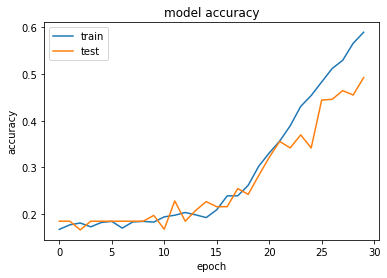

In [112]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


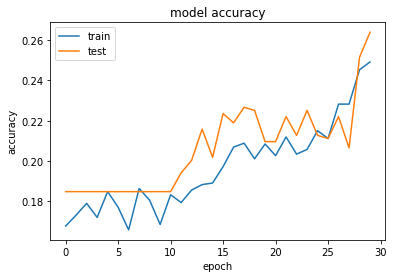

In [113]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


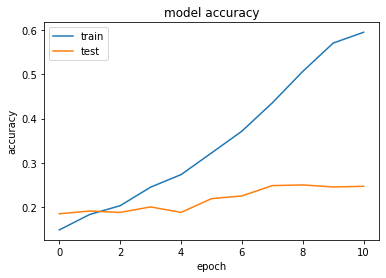

In [114]:
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 4**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


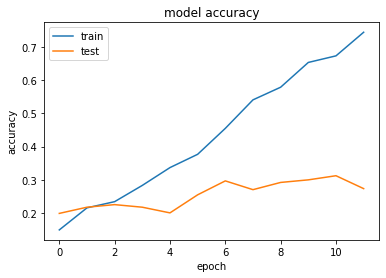

In [115]:
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**CNN Model 5**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


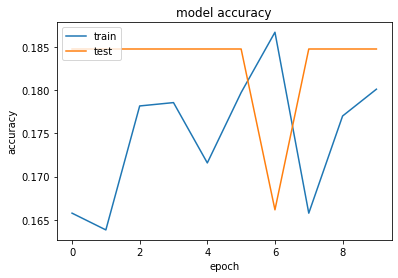

In [116]:
print(history5.history.keys())
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Model Evaluation**

**CNN Model 1**

In [118]:
model.evaluate(X_test,y_test_e)

12/12 [==============================] - 0s 9ms/step - loss: 1.3995 - accuracy: 0.5279


[1.3994545936584473, 0.5279329419136047]

**CNN Model 2**

In [117]:
model2.evaluate(X_test,y_test_e)

12/12 [==============================] - 0s 9ms/step - loss: 1.9350 - accuracy: 0.2682


[1.9350470304489136, 0.2681564390659332]

**CNN Model 3**

In [86]:
model3.evaluate(X_test,y_test_e)

12/12 [==============================] - 0s 6ms/step - loss: 2.1355 - accuracy: 0.2235


[2.135524272918701, 0.22346368432044983]

**CNN Model 4**

In [87]:
model4.evaluate(X_test,y_test_e)

12/12 [==============================] - 0s 6ms/step - loss: 2.7249 - accuracy: 0.2933


[2.7249488830566406, 0.29329609870910645]

**CNN Model 5**

In [124]:
model5.evaluate(X_test,y_test_e)

12/12 [==============================] - 0s 12ms/step - loss: 2.1232 - accuracy: 0.1816


[2.123166799545288, 0.18156424164772034]

Unfortunately, **we cannot decide the best model based on only test accuracy here** .Seems model1 has the best accuracy so far of 0.52.
We will also check the **F1 score** to try to achieve a good balance between Precision and Recall. 

### **Plotting the confusion matrix for the two best models** 

As we can see, **Model 1  & Model 2 seem to be generalizing best compared to others** because they both have a good Holdout set Accuracy and tet train over fitting is minimal. 
**Let us compute the confusion matrix** for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

**CNN Model 1**

In [97]:
# Test Prediction 
y_test_pred_ln1 = model.predict(X_test)
y_test_pred_classes_ln1 = np.argmax(y_test_pred_ln1, axis=1)
y_test_pred_prob_ln1 = np.max(y_test_pred_ln1, axis=1)


In [98]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln1)



0.5279329608938548

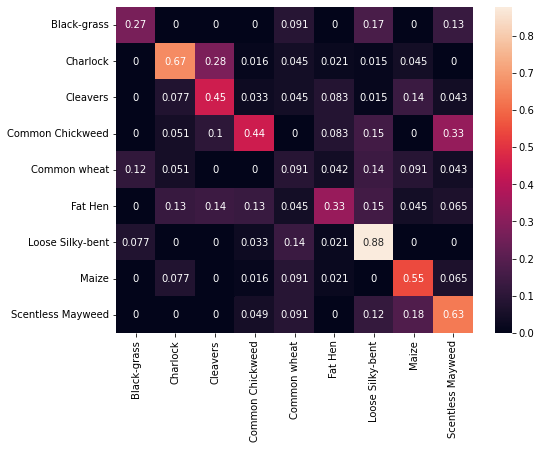

In [99]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln1)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**Loose Silky-Bent ,Charlock and Maize species** can bestrongly predicted by this model 1



**CNN Model 2**

In [119]:
#Test Prediction 

y_test_pred_ln2 = model2.predict(X_test)
y_test_pred_classes_ln2 = np.argmax(y_test_pred_ln2, axis=1)
y_test_pred_prob_ln2 = np.max(y_test_pred_ln2, axis=1)


In [120]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln2)



0.2681564245810056

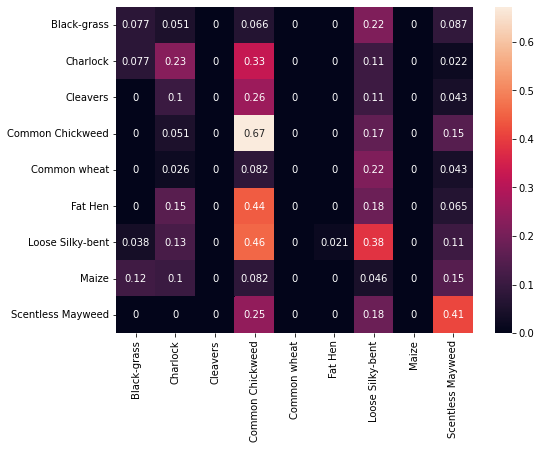

In [121]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln2)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**Common Chickweed species** can be strongly predicted by this model 2


The above two confusion matrices show that the models seem to be working well. **Let's calculate the F1 score** (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



The order of printing the above metrices for each class is as follows:
"Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed"
- **Black-grass**
- **Charlock**
- **Cleavers**
- **Common Chickweed**
- **Common wheat**
- **Fat Hen**
- **Loose Silky-bent**
- **Maize**
- **Scentless Mayweed**



**CNN Model 1**

In [122]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln1, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.58333333 0.63414634 0.46428571 0.61363636 0.14285714 0.55172414
 0.53271028 0.52173913 0.48333333]
 Recall is [0.26923077 0.66666667 0.44827586 0.44262295 0.09090909 0.33333333
 0.87692308 0.54545455 0.63043478] 
 f_beta Score is [0.36842105 0.65       0.45614035 0.51428571 0.11111111 0.41558442
 0.6627907  0.53333333 0.54716981]


**CNN Model 2**

In [123]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln2, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.25       0.27272727 0.         0.25465839 0.         0.
 0.23809524 0.         0.38      ]
 Recall is [0.07692308 0.23076923 0.         0.67213115 0.         0.
 0.38461538 0.         0.41304348] 
 f_beta Score is [0.11764706 0.25       0.         0.36936937 0.         0.
 0.29411765 0.         0.39583333]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model1 (Best) Observation**
The odel can predict the following from the test data :

- **Black-grass** has a 36% chance of being predicted correctly.Has a low recall((high false negetives).
- **Charlock**   has a 65% chance of being predicted correctly.
- **Cleavers**  has a 45% chance of being predicted correctly.Has a low recall((high false negetives).
- **Common Chickweed** has a 51% chance of being predicted correctly.Has a low recall((high false negetives).
- **Common wheat**has a 11% chance of being predicted correctly.Has a low recall((high false negetives).
- **Fat Hen** has a 41% chance of being predicted correctly.Has a low recall((high false negetives).
- **Loose Silky-bent** has a 65% chance of being predicted correctly.
- **Maize** has a 53% chance of being predicted correctly.Has a low recall((high false negetives).
- **Scentless Mayweed** has a 55% chance of being predicted correctly.


### **Weighted F-Score**

**Model 1**

In [125]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln1, average='weighted')

0.5081158729349436

**Model 2**

In [126]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln2, average='weighted')

0.20297859065111773

### **Conclusion**

As we have seen, **ANNs do not work well with image data**, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas CNNs take the full 2D-image as input in order to perform feature extraction. So **CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.**

**There is still scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better brain tumor classifier. 

The CNN model needed more tuning with different filter paramets and testing different activations methods with additions Dense layers to get a better **accuracy & minimal loss function** value for the sample Test and Training images provided. 
